# Model Machine Learning

#### Standarisasi

In [ ]:
new_df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes,diet_quality_encoded,parental_education_encoded,internet_quality_encoded
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,0,0,1,0,0,1,1,2,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,1,0,0,1,0,1,0,2,0,1
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,1,0,1,0,1,0,0,0,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,1,0,0,1,0,0,1,0,2,2
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,0,0,1,0,1,0,1,2,2


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,481
Male,477
Other,42


In [ ]:
for col in new_df.columns:
    print(f"{col}: {new_df[col].nunique()}")


age: 8
study_hours_per_day: 78
social_media_hours: 60
netflix_hours: 51
attendance_percentage: 320
sleep_hours: 68
exercise_frequency: 7
mental_health_rating: 10
exam_score: 480
gender_Female: 2
gender_Male: 2
gender_Other: 2
part_time_job_No: 2
part_time_job_Yes: 2
extracurricular_participation_No: 2
extracurricular_participation_Yes: 2
diet_quality_encoded: 3
parental_education_encoded: 4
internet_quality_encoded: 3


In [ ]:
new_df.isnull().sum()

,0
age,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
attendance_percentage,0
sleep_hours,0
exercise_frequency,0
mental_health_rating,0
exam_score,0
gender_Female,0


In [ ]:
X = new_df.drop('exam_score', axis=1)
y = new_df['exam_score']

In [ ]:
# Kolom-kolom yang akan di-scale
scale_columns = [
    'mental_health_rating', 'age', 'sleep_hours',
    'attendance_percentage', 'netflix_hours',
    'social_media_hours', 'study_hours_per_day'
]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# ColumnTransformer hanya men-scale kolom yang dipilih, kolom lain dibiarkan (remainder='passthrough')
scaler = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale_columns)
    ],
    remainder='passthrough'  # kolom lain tetap masuk, tapi tidak di-scale
)

# Terapkan scaling
X_scaled = scaler.fit_transform(X)

In [ ]:
# Supaya tetap dalam DataFrame dan urutan kolom bisa dilihat:
scaled_feature_names = scale_columns + [col for col in X.columns if col not in scale_columns]
X_scaled_df = pd.DataFrame(X_scaled, columns=scaled_feature_names)

In [ ]:
X_scaled_df.shape

(1000, 18)

In [ ]:
print(list(X_scaled_df.columns))

['mental_health_rating', 'age', 'sleep_hours', 'attendance_percentage', 'netflix_hours', 'social_media_hours', 'study_hours_per_day', 'exercise_frequency', 'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No', 'part_time_job_Yes', 'extracurricular_participation_No', 'extracurricular_participation_Yes', 'diet_quality_encoded', 'parental_education_encoded', 'internet_quality_encoded']


In [ ]:
print(list(X_scaled_df.columns))  # Untuk memastikan kolom sudah sesuai
print(X_scaled_df.head())         # Untuk melihat 5 baris pertama


['mental_health_rating', 'age', 'sleep_hours', 'attendance_percentage', 'netflix_hours', 'social_media_hours', 'study_hours_per_day', 'exercise_frequency', 'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No', 'part_time_job_Yes', 'extracurricular_participation_No', 'extracurricular_participation_Yes', 'diet_quality_encoded', 'parental_education_encoded', 'internet_quality_encoded']
   mental_health_rating       age  sleep_hours  attendance_percentage  \
0              0.900186  1.084551     1.248120               0.092426   
1              0.900186 -0.215870    -1.525661               1.401696   
2             -1.559339  0.217604     1.248120               1.135584   
3             -1.559339  1.084551     2.227102              -1.397800   
4             -1.559339 -0.649344    -1.280916               0.720450   

   netflix_hours  social_media_hours  study_hours_per_day  exercise_frequency  \
0      -0.669750           -1.114064            -2.418068                 6.0   

In [ ]:
X_scaled_df.to_csv("data_bersih.csv", index=False)

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 18), (200, 18), (800,), (200,))

#### Model Training

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X.isnull().sum()


,0
age,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
attendance_percentage,0
sleep_hours,0
exercise_frequency,0
mental_health_rating,0
gender_Female,0
gender_Male,0


#### LinearRegression

In [ ]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.3f}, RMSE: {mean_squared_error(y_test, y_pred):.2f}")

Linear → R²: 0.899, RMSE: 25.95
Ridge → R²: 0.899, RMSE: 25.95
Lasso → R²: 0.899, RMSE: 25.88
Random Forest → R²: 0.810, RMSE: 48.65


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} → R²: {r2:.3f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Linear → R²: 0.899, RMSE: 5.09, MAE: 4.15
Ridge → R²: 0.899, RMSE: 5.09, MAE: 4.15
Lasso → R²: 0.899, RMSE: 5.09, MAE: 4.13


#### Evaluasi

Linear → R²: 0.899, RMSE: 5.09, MAE: 4.15
Ridge → R²: 0.899, RMSE: 5.09, MAE: 4.15
Lasso → R²: 0.899, RMSE: 5.09, MAE: 4.13


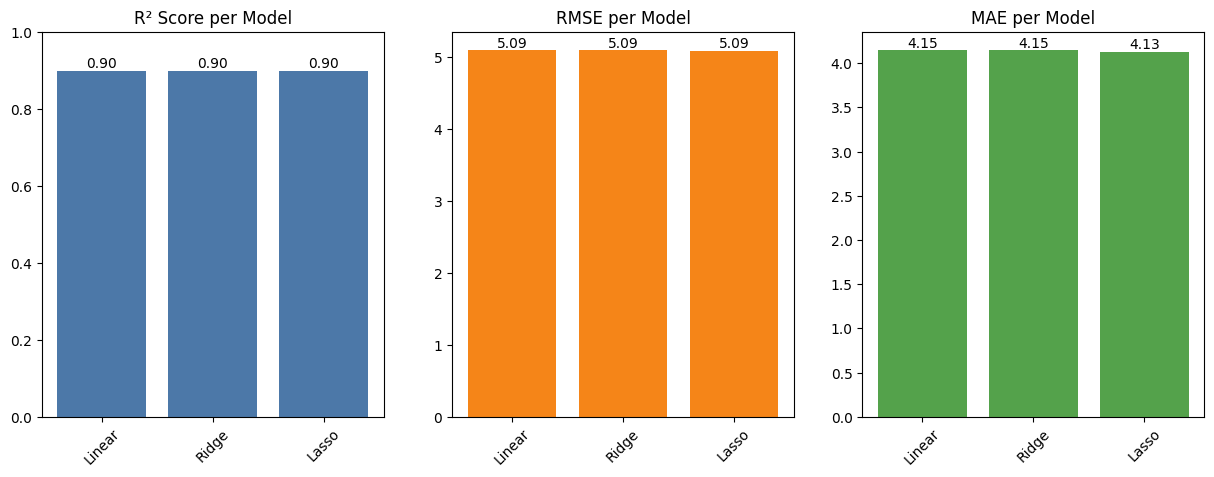

In [ ]:
import matplotlib.pyplot as plt

r2_scores = []
rmse_scores = []
mae_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)  # ← Tambahkan ini!

    r2_scores.append(r2)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

    print(f"{name} → R²: {r2:.3f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Plot (3 kolom)
plt.figure(figsize=(15, 5))

# R²
plt.subplot(1, 3, 1)
bars = plt.bar(models.keys(), r2_scores, color='#4C78A8')
plt.title('R² Score per Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{score:.2f}",
             ha='center', va='bottom', color='black', fontsize=10)

# RMSE
plt.subplot(1, 3, 2)
bars = plt.bar(models.keys(), rmse_scores, color='#F58518')
plt.title('RMSE per Model')
plt.xticks(rotation=45)
for bar, score in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{score:.2f}",
             ha='center', va='bottom', color='black', fontsize=10)

# MAE
plt.subplot(1, 3, 3)
bars = plt.bar(models.keys(), mae_scores, color='#54A24B')
plt.title('MAE per Model')
plt.xticks(rotation=45)
for bar, score in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{score:.2f}",
             ha='center', va='bottom', color='black', fontsize=10)

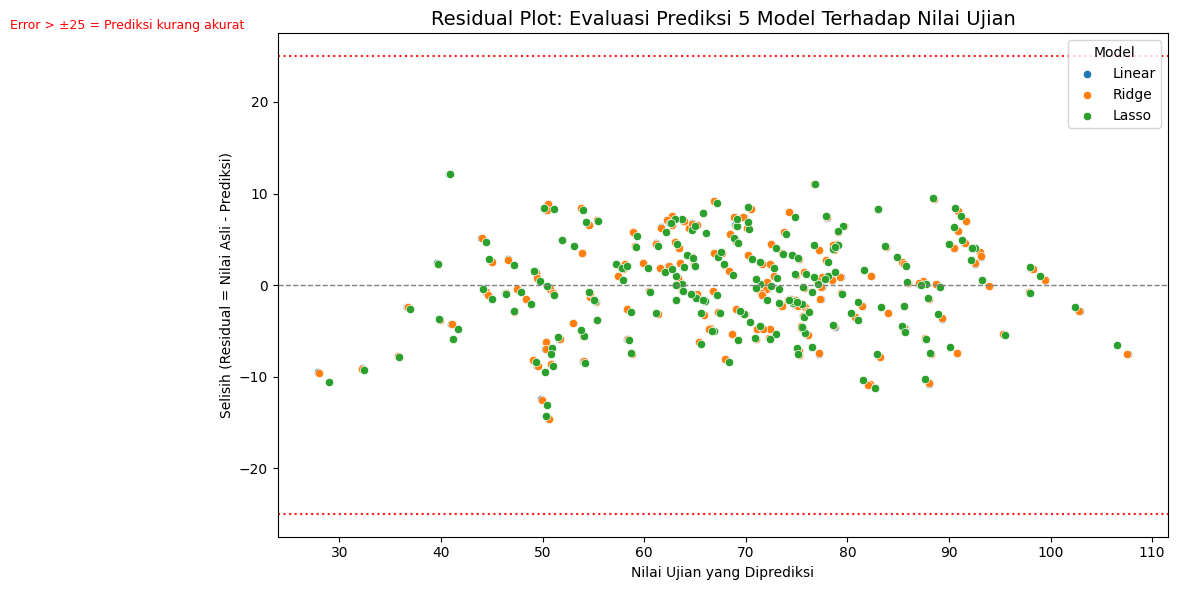

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for min/max calculations


plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred #Hitung residual (selisih nilai asli - prediksi)
    sns.scatterplot(x=y_pred, y=residuals, label=name)

# Garis horizontal netral (residual = 0)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)

# Garis "zona aman" error (±25)
plt.axhline(25, linestyle=':', color='red', alpha=0.9)
plt.axhline(-25, linestyle=':', color='red', alpha=0.9)

# Teks bantu
# Access the minimum value of X_test using .min()
plt.text(X_test['study_hours_per_day'].min(), 28, 'Error > ±25 = Prediksi kurang akurat', color='red', fontsize=9)


plt.title('Residual Plot: Evaluasi Prediksi 5 Model Terhadap Nilai Ujian', fontsize=14)
plt.xlabel('Nilai Ujian yang Diprediksi')
plt.ylabel('Selisih (Residual = Nilai Asli - Prediksi)')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("\nCross-Validation Scores (5-Fold):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name}: Mean R² = {np.mean(scores):.3f} | Std = {np.std(scores):.3f}")



Cross-Validation Scores (5-Fold):
Linear: Mean R² = 0.896 | Std = 0.021
Ridge: Mean R² = 0.896 | Std = 0.021
Lasso: Mean R² = 0.896 | Std = 0.021


In [ ]:
import pandas as pd

# Ambil koefisien model
coefs = pd.Series(models["Lasso"].coef_, index=X_train.columns)

# Urutkan berdasarkan pengaruh terbesar
coefs_sorted = coefs.sort_values(key=abs, ascending=False)

# Tampilkan top 10 fitur paling berpengaruh
print(coefs_sorted.head(10))

study_hours_per_day      13.905465
mental_health_rating      5.453182
social_media_hours       -3.067560
netflix_hours            -2.400511
sleep_hours               2.339574
exercise_frequency        1.292204
attendance_percentage     1.266316
diet_quality_encoded     -0.133367
age                       0.020026
gender_Female            -0.000000
dtype: float64


/tmp/ipython-input-57-3161348931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs_sorted.head(10).values, y=coefs_sorted.head(10).index, palette='coolwarm')


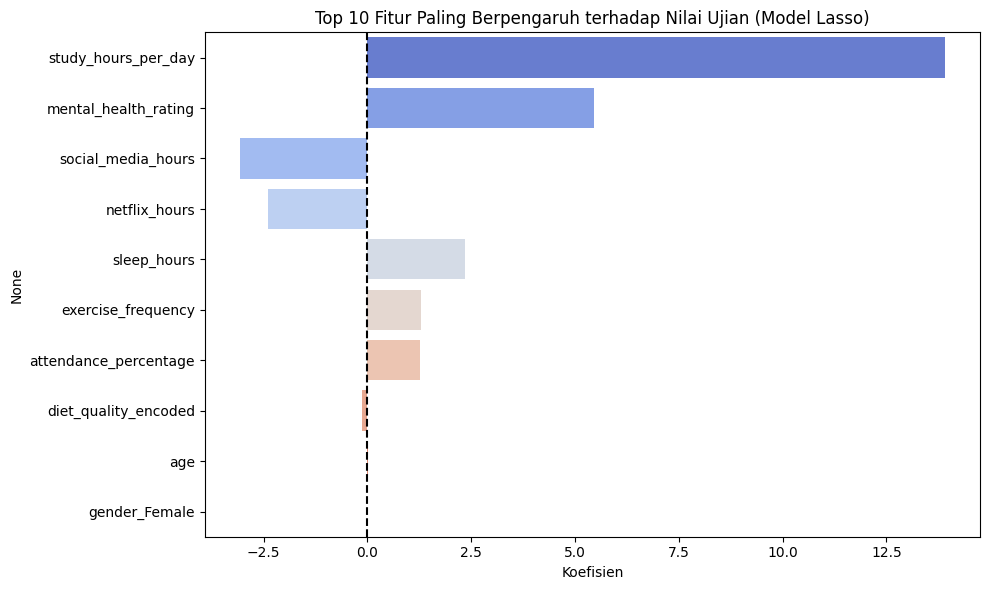

In [ ]:
# 4. Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs_sorted.head(10).values, y=coefs_sorted.head(10).index, palette='coolwarm')
plt.title('Top 10 Fitur Paling Berpengaruh terhadap Nilai Ujian (Model Lasso)')
plt.xlabel('Koefisien')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# Ambil koefisien model
coefs_linear = pd.Series(models["Linear"].coef_, index=X_train.columns)

# Urutkan berdasarkan pengaruh terbesar
coefs_sorted_lin = coefs_linear.sort_values(key=abs, ascending=False)

# Tampilkan top 10 fitur paling berpengaruh
print(coefs_sorted_lin.head(10))

study_hours_per_day      14.010720
mental_health_rating      5.565305
social_media_hours       -3.170826
netflix_hours            -2.491001
sleep_hours               2.421620
attendance_percentage     1.372313
exercise_frequency        1.317826
gender_Other              0.452111
diet_quality_encoded     -0.321554
gender_Female            -0.282878
dtype: float64


/tmp/ipython-input-59-994532460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs_sorted_lin.head(10).values, y=coefs_sorted_lin.head(10).index, palette='coolwarm')


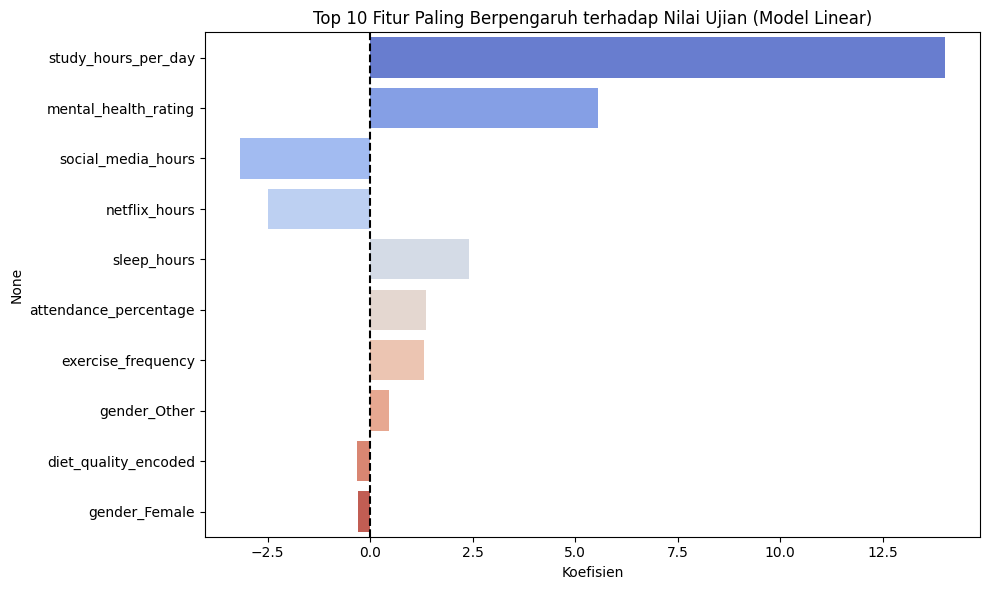

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs_sorted_lin.head(10).values, y=coefs_sorted_lin.head(10).index, palette='coolwarm')
plt.title('Top 10 Fitur Paling Berpengaruh terhadap Nilai Ujian (Model Linear)')
plt.xlabel('Koefisien')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

study_hours_per_day      13.993466
mental_health_rating      5.558390
social_media_hours       -3.166862
netflix_hours            -2.488325
sleep_hours               2.418335
attendance_percentage     1.370935
exercise_frequency        1.317321
gender_Other              0.443518
diet_quality_encoded     -0.319990
gender_Female            -0.277714
dtype: float64


/tmp/ipython-input-60-2271061146.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs_sorted_Ridge.head(10).values, y=coefs_sorted_Ridge.head(10).index, palette='coolwarm')


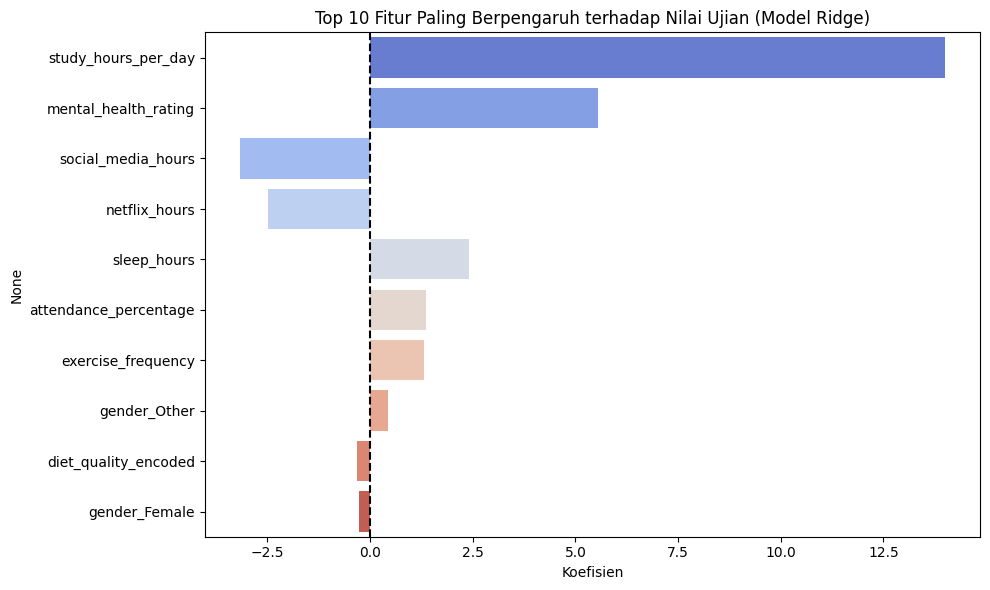

In [ ]:
# Ambil koefisien model
coefs_Ridge = pd.Series(models["Ridge"].coef_, index=X_train.columns)

# Urutkan berdasarkan pengaruh terbesar
coefs_sorted_Ridge = coefs_Ridge.sort_values(key=abs, ascending=False)

# Tampilkan top 10 fitur paling berpengaruh
print(coefs_sorted_Ridge.head(10))


plt.figure(figsize=(10, 6))
sns.barplot(x=coefs_sorted_Ridge.head(10).values, y=coefs_sorted_Ridge.head(10).index, palette='coolwarm')
plt.title('Top 10 Fitur Paling Berpengaruh terhadap Nilai Ujian (Model Ridge)')
plt.xlabel('Koefisien')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Deploy Streamlit

In [ ]:
import joblib

joblib.dump(X_train.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']